In [1]:
# Clustering of insurance dataset
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df=pd.read_csv("Insurance Dataset.csv")

In [4]:
df.describe()

,Premiums Paid,Age,Days to Renew,Claims made,Income
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,12542.250000,46.110000,120.400000,12578.993367,102250.000000
std,6790.731666,13.887641,88.055767,13695.906762,43517.237964
min,2800.000000,23.000000,1.000000,1978.260870,28000.000000
25%,6975.000000,34.000000,56.000000,5220.648735,65125.000000
50%,11825.000000,45.000000,89.000000,8386.043907,102250.000000
75%,15475.000000,54.500000,186.500000,14670.889520,139375.000000
max,29900.000000,82.000000,321.000000,99676.744190,176500.000000


In [5]:
df.head()

,Premiums Paid,Age,Days to Renew,Claims made,Income
0,2800,26,233,3890.076336,28000
1,2950,27,130,2294.444444,29500
2,3100,28,144,2564.545455,31000
3,3250,30,65,1978.260870,32500
4,3400,32,56,2009.090909,34000


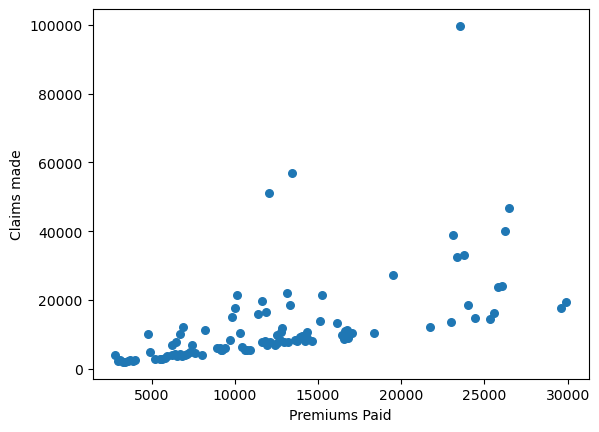

In [6]:
#(Premiums Paid vs Claims made )lets have the scatter plot of premium and claims
plt.scatter(insurance['Premiums Paid'], insurance['Claims made'],s=30)
plt.xlabel('Premiums Paid')
plt.ylabel('Claims made')
plt.show()

In [ ]:
cols = ['Premiums Paid', 'Age', 'Days to Renew', 'Claims made', 'Income']

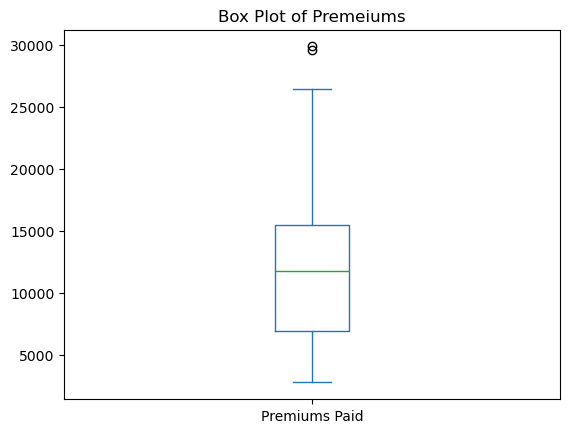

In [7]:
df['Premiums Paid'].plot(kind='box')
plt.title('Box Plot of Premeiums')
plt.show()

In [8]:
df.corr()

,Premiums Paid,Age,Days to Renew,Claims made,Income
Premiums Paid,1.000000,0.554314,0.129884,0.567047,0.880833
Age,0.554314,1.000000,0.118577,0.331819,0.309009
Days to Renew,0.129884,0.118577,1.000000,0.654598,0.090823
Claims made,0.567047,0.331819,0.654598,1.000000,0.492533
Income,0.880833,0.309009,0.090823,0.492533,1.000000


In [9]:
cols = ['Premiums Paid', 'Age', 'Days to Renew', 'Claims made', 'Income']

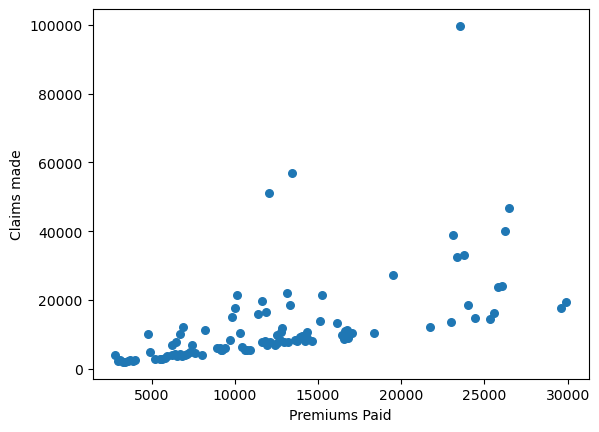

In [10]:
# Initial scatter plot (Premiums Paid vs Claims made)
plt.scatter(df['Premiums Paid'],df['Claims made'],s=30)
plt.xlabel('Premiums Paid')
plt.ylabel('Claims made')
plt.show()

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()# Fit and transform the selected columns
df_scaled = scaler.fit_transform(df[cols])
df_scaled = pd.DataFrame(df_scaled, columns=cols)

In [12]:
# Initialize KMeans
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
y_predicted = km.fit_predict(df_scaled)
df['cluster'] = y_predicted

C:\Users\Vaishnavi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [13]:
# Display cluster centers in the scaled space
print("Cluster Centers (scaled):")
print(km.cluster_centers_)

Cluster Centers (scaled):
[[0.36693807 0.34156227 0.3326087  0.08426433 0.58695652]
 [0.73800738 0.63922518 0.53809524 0.2885416  0.83934584]
 [0.10824108 0.30405752 0.32462121 0.027725   0.16284053]]


In [14]:
centroids_original = scaler.inverse_transform(km.cluster_centers_)
print("Cluster Centers (original scale):")
print(centroids_original)

Cluster Centers (original scale):
[[1.27440217e+04 4.31521739e+01 1.07434783e+02 1.02107577e+04
  1.15163043e+05]
 [2.28000000e+04 6.07142857e+01 1.73190476e+02 3.01683378e+04
  1.52642857e+05]
 [5.73333333e+03 4.09393939e+01 1.04878788e+02 4.68695123e+03
  5.21818182e+04]]


In [16]:
# Creating dataframes for each cluster
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 =df[df.cluster == 2]

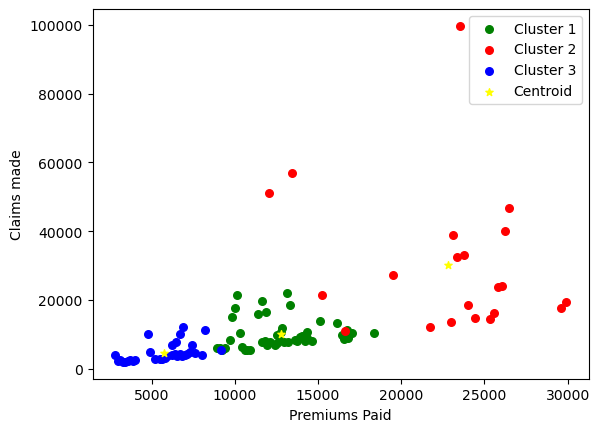

In [17]:
#plotting the cluster centers
plt.scatter(df1['Premiums Paid'], df1['Claims made'], color='green', label='Cluster 1',s=30)
plt.scatter(df2['Premiums Paid'], df2['Claims made'], color='red', label='Cluster 2',s=30)
plt.scatter(df3['Premiums Paid'], df3['Claims made'], color='blue', label='Cluster 3',s=30)
plt.scatter(centroids_original[:, 0], centroids_original[:, 3], color='yellow', marker='*', s=30, label='Centroid')
plt.xlabel('Premiums Paid')
plt.ylabel('Claims made')
plt.legend()
plt.show()

In [18]:
df_norm = scaler.fit_transform(df[cols])

In [19]:
#Determine number of clusters
TWSS = []
k = list(range(2, 8))

for i in k:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_norm)
    TWSS.append(kmeans.inertia_)

C:\Users\Vaishnavi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Vaishnavi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Vaishnavi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Vaishnavi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memor

C:\Users\Vaishnavi\AppData\Local\Temp\ipykernel_516\3610680991.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(k, TWSS, 'ro-',color='green')


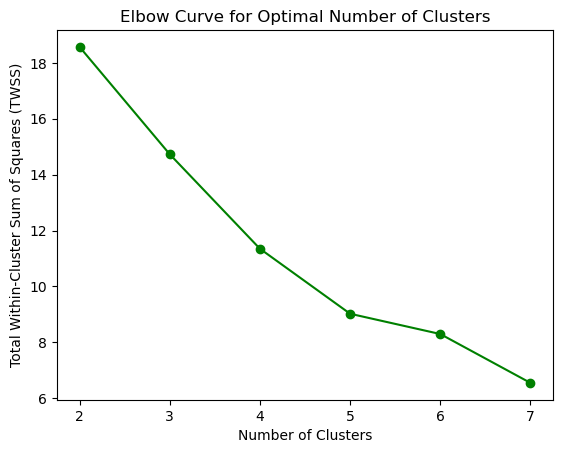

In [20]:
plt.plot(k, TWSS, 'ro-',color='green')
plt.xlabel("Number of Clusters")
plt.ylabel("Total Within-Cluster Sum of Squares (TWSS)")
plt.title("Elbow Curve for Optimal Number of Clusters")
plt.show()